In [1]:
import importlib
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import pipeline as pp
import stats_hc as hc

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\henri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [110]:
importlib.reload(hc)
Stat = hc.Statistics("../datasets/sample/dataset.csv")

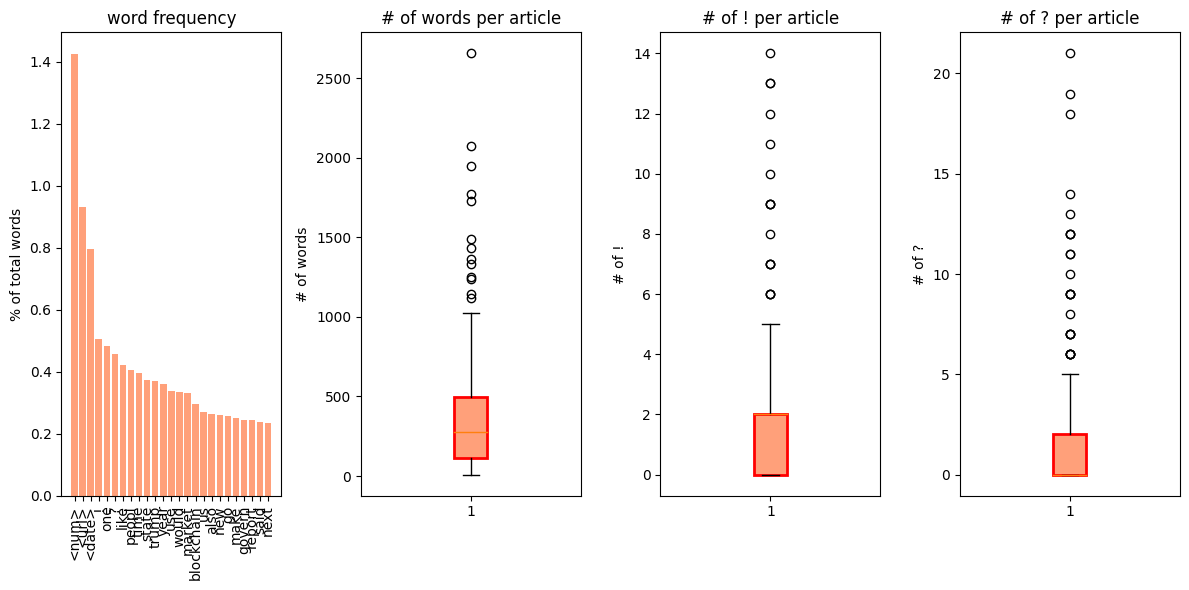

In [73]:
Stat.plot_combined()

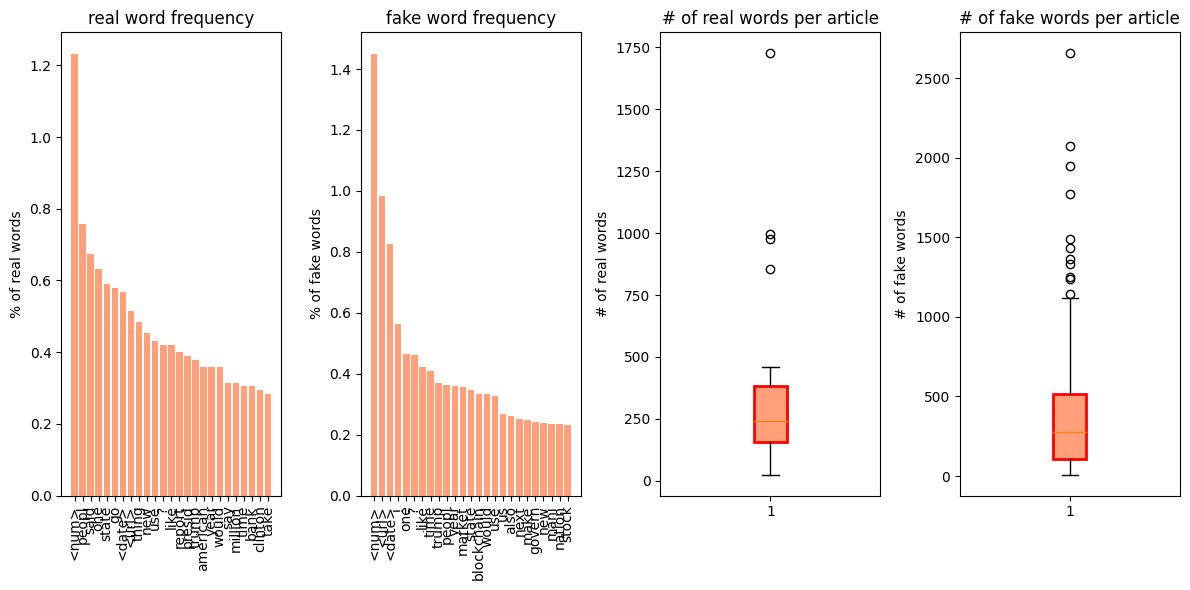

In [74]:
Stat.plot_combined_fake_vs_real()

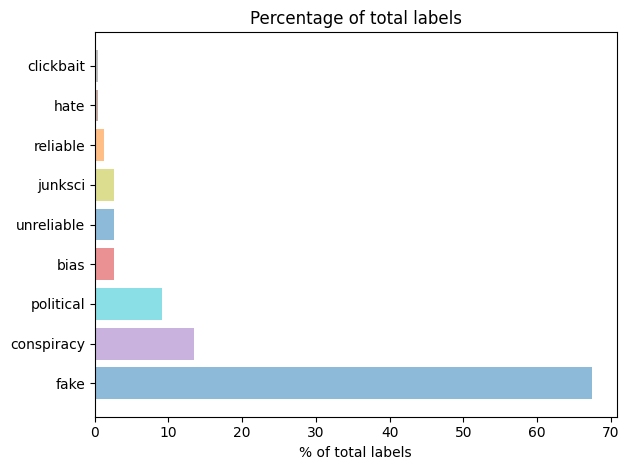

In [111]:
Stat.barplot_type_distribution(percentage = True)

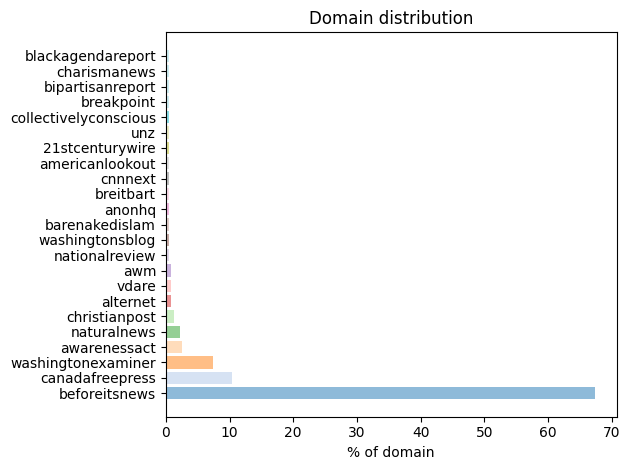

In [112]:
Stat.barplot_domain_distribution(percentage = True)

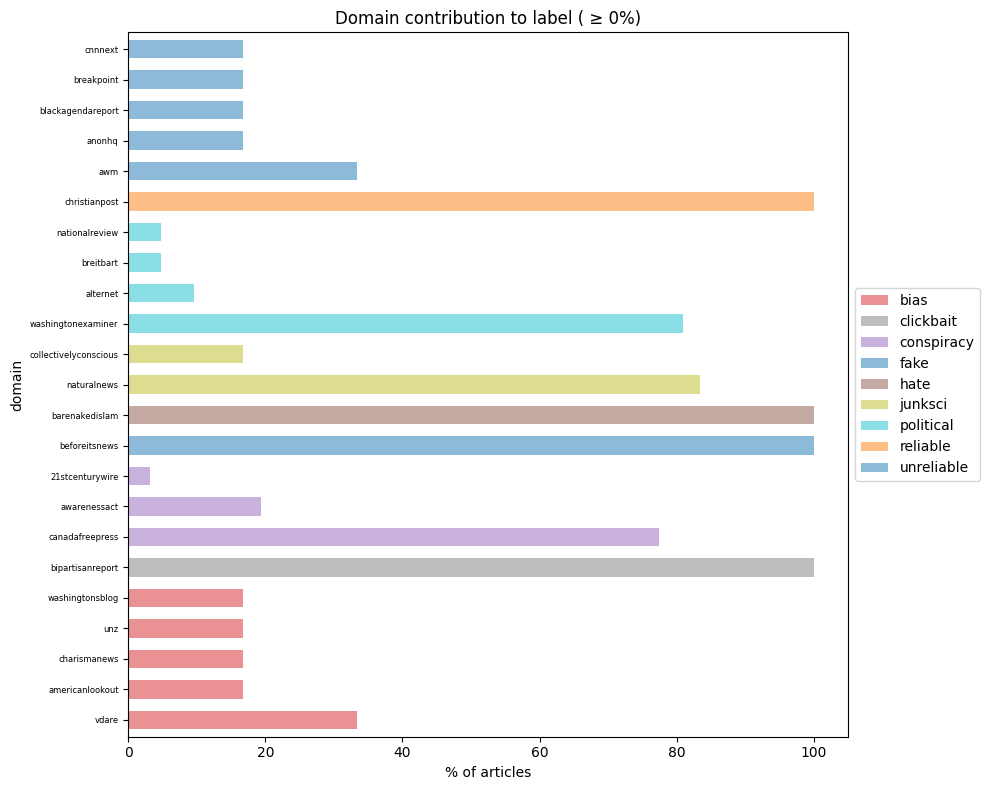

In [113]:
Stat.barplot_domain_contribution(threshold=0, percentage=True)

In [ ]:
Stat.plot_combined_sentence_analysis()